In [1]:
#rename file in the dataset
# import os

# def rename_files_with_parent_folder(folder_path):
#     # Iterate through each file in the folder
#     for filename in os.listdir(folder_path):
#         # Check if the item is a file
#         if os.path.isfile(os.path.join(folder_path, filename)):
#             # Get the parent folder name
#             parent_folder_name = os.path.basename(os.path.normpath(folder_path))
#             # Rename the file
#             new_filename = f"{parent_folder_name}_{filename}"
#             os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
#             print(f"Renamed '{filename}' to '{new_filename}'")

# # Provide the path to the first folder containing the files
# folder_path1 = "real"
# rename_files_with_parent_folder(folder_path1)

# # Provide the path to the second folder containing the files
# folder_path2 = "fake"
# rename_files_with_parent_folder(folder_path2)


In [2]:
# creating csv to be the metadata 
# import glob

# def load_video_files(directory):
#     video_files = glob.glob(directory + '/*.mp4')
#     video_files = [x.split("\\")[-1] for x in video_files]
#     return video_files

# import pandas as pd

# # Step 1: Load Video Files from Directories
# real_video_files = load_video_files("real")
# fake_video_files = load_video_files("fake")


# # Step 2: Create DataFrame with Labels
# all_video_files = real_video_files + fake_video_files
# labels = ['REAL'] * len(real_video_files) + ["FAKE"] * len(fake_video_files)

# data = {'file': all_video_files, 'label': labels}
# df = pd.DataFrame(data)

# # Step 3: Save DataFrame to CSV
# df.to_csv('video_labels.csv', index=False)


In [3]:
# find the mean and std of the videos 

# import cv2
# import numpy as np
# import os
# import random
# import glob

# def calculate_stats(video_path):
#     total_frames = 0
#     mean = np.zeros(3)
#     std = np.zeros(3)

#     cap = cv2.VideoCapture(video_path)

#     while(cap.isOpened()):
#         ret, frame = cap.read()
#         if not ret:
#             break
        
#         frame = frame.astype(np.float32) / 255.0
#         mean += np.mean(frame, axis=(0,1))
#         std += np.std(frame, axis=(0,1)) ** 2
#         total_frames += 1

#     cap.release()

#     return mean, std, total_frames

# def aggregate_stats(results):
#     total_frames = 0
#     mean = np.zeros(3)
#     std = np.zeros(3)

#     for result in results:
#         mean += result[0]
#         std += result[1]
#         total_frames += result[2]

#     mean /= total_frames
#     std = np.sqrt(std / total_frames)

#     return mean, std

# # Paths to the directories containing your video dataset
# dataset_dir1 = 'real'
# dataset_dir2 = 'fake'

# # Get list of video file paths in the dataset directories using glob
# video_paths1 = glob.glob(os.path.join(dataset_dir1, '*.mp4'))
# video_paths2 = glob.glob(os.path.join(dataset_dir2, '*.mp4'))

# # Randomly select a subset of videos from each directory
# subset_size = 100  # Adjust the subset size as needed
# random.shuffle(video_paths1)
# random.shuffle(video_paths2)
# selected_video_paths = video_paths1[:subset_size] + video_paths2[:subset_size]

# # Calculate statistics for each selected video
# results = []
# for video_path in selected_video_paths:
#     results.append(calculate_stats(video_path))

# # Aggregate the results
# mean, std = aggregate_stats(results)

# print("Mean pixel values:", mean)
# print("Standard deviation pixel values:", std)


Mean pixel values: [0.30744792 0.33174657 0.44394907]
Standard deviation pixel values: [0.17503524 0.18142716 0.23555627]

In [4]:
# # THis code is to check if the video is corrupted or not..
# # If the video is corrupted delete the video.

# import glob
# import torch
# import torchvision
# from torchvision import transforms
# from torch.utils.data import DataLoader
# from torch.utils.data.dataset import Dataset
# import os
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt

# # Check if the file is corrupted or not
# def validate_video(vid_path,train_transforms):
#       transform = train_transforms
#       count = 20
#       video_path = vid_path
#       frames = []
#       for i,frame in enumerate(frame_extract(video_path)):
#         frames.append(transform(frame))
#         if(len(frames) == count):
#           break
#       frames = torch.stack(frames)
#       frames = frames[:count]
#       return frames
    
# #extract a from from video
# def frame_extract(path):
#   vidObj = cv2.VideoCapture(path) 
#   success = 1
#   while success:
#       success, image = vidObj.read()
#       if success:
#           yield image

# im_size = 126
# mean = [0.30744792 ,0.33174657 ,0.44394907]
# std = [0.17503524 ,0.18142716 ,0.23555627]

# train_transforms = transforms.Compose([
#                                         transforms.ToPILImage(),
#                                         transforms.Resize((im_size,im_size)),
#                                         transforms.ToTensor(),
#                                         transforms.Normalize(mean,std)])


# video_fil =  glob.glob('real\*.mp4')
# video_fil += glob.glob('fake\*.mp4')


# print("Total no of videos :" , len(video_fil))
# print(video_fil)

# count = 0
# for i in video_fil:
#   try:
#     count+=1
#     validate_video(i,train_transforms)
#   except:
#     print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
#     print("Corrupted video is : " , i)
#     continue
# print((len(video_fil) - count))

In [5]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random

video_files =  glob.glob('real\*.mp4')
video_files += glob.glob('fake\*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.min(frame_count))

frames are  [150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 134, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 118, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 15

In [6]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import  pandas as pd 

class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('\\')[-1]
        #print(temp_video)
        label = self.labels.iloc[(self.labels.loc[self.labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
              
#plot the image
#image = image * std + mean
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.17503524 ,0.18142716 ,0.23555627] +  [0.30744792 ,0.33174657 ,0.44394907]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()
    
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('video_labels.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('\\')[-1]
    # label = lab[lab["file"] == temp_video]["label"].values[0]
    label = lab.iloc[(lab.loc[lab["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

C:\Users\mahes\AppData\Local\Temp\ipykernel_8488\92228316.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import  pandas as pd


In [7]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('video_labels.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)


train :  5956
test :  1489


In [8]:

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])



TRAIN:  Real: 2980  Fake: 2976
TEST:  Real: 734  Fake: 755


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


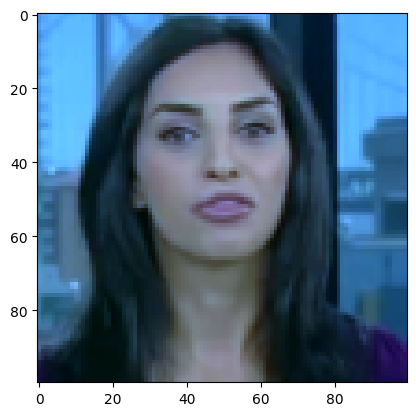

tensor([[[[ 2.1195,  2.5676,  2.7244,  ...,  2.9933,  2.9933,  2.9933],
          [ 1.9626,  2.3659,  2.5676,  ...,  2.9933,  2.9933,  2.9933],
          [ 1.9851,  2.4331,  2.5676,  ...,  2.9933,  2.9933,  2.9933],
          ...,
          [-0.9499, -1.0395, -1.1740,  ..., -0.4794, -0.4570, -0.4122],
          [-0.9723, -1.0395, -1.1516,  ..., -0.5467, -0.5018, -0.4794],
          [-0.9723, -1.0620, -1.1740,  ..., -0.6139, -0.5691, -0.5242]],

         [[ 1.5218,  1.9109,  1.9973,  ...,  2.0622,  2.0622,  2.0622],
          [ 1.3705,  1.6947,  1.8244,  ...,  2.0622,  2.0622,  2.0622],
          [ 1.3921,  1.7596,  1.8460,  ...,  2.0622,  2.0622,  2.0622],
          ...,
          [-1.4179, -1.4611, -1.5043,  ..., -1.5259, -1.5043, -1.4827],
          [-1.4611, -1.5043, -1.5259,  ..., -1.5692, -1.5259, -1.5043],
          [-1.5043, -1.5475, -1.5692,  ..., -1.6124, -1.5908, -1.5475]],

         [[-0.0201,  0.2463,  0.2796,  ...,  0.1797,  0.1797,  0.1797],
          [-0.1366,  0.0798,  

In [9]:

im_size = 100
mean = [0.30744792 ,0.33174657 ,0.44394907]
std = [0.17503524 ,0.18142716 ,0.23555627]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

train_data = video_dataset(train_videos,labels,sequence_length = 30,transform = train_transforms)

val_data = video_dataset(valid_videos,labels,sequence_length = 30,transform = train_transforms)

train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 0)

valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 0)

image,label = train_data[0]
im_plot(image[0,:,:,:])
image

In [10]:
from torch import nn
from torchvision import models

class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        # Load pre-trained ResNet-101 model
        model = models.resnet101(pretrained=True)
        
        # Remove the fully connected layer and average pooling layer from the original ResNet-101
        self.model = nn.Sequential(*list(model.children())[:-2])
        
        # Define LSTM layer
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        
        # Activation function
        self.relu = nn.LeakyReLU()
        
        # Dropout layer
        self.dp = nn.Dropout(0.4)
        
        # Linear layer for classification
        self.linear1 = nn.Linear(2048, num_classes)  # Adjust output features for ResNet-101
        
        # Adaptive average pooling
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        
        # Reshape the input tensor to combine batch size and sequence length
        x = x.view(batch_size * seq_length, c, h, w)
        
        # Pass through the ResNet-101 model
        fmap = self.model(x)
        
        # Apply adaptive average pooling
        x = self.avgpool(fmap)
        
        # Reshape for LSTM input
        x = x.view(batch_size, seq_length, 2048)
        
        # Pass through LSTM
        x_lstm, _ = self.lstm(x, None)
        
        # Return feature maps and predictions
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [11]:
from torch import nn
from torchvision import models

class Model(nn.Module):
    def __init__(self, num_classes, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        self.vgg16 = models.vgg16(pretrained=True)  # Load pre-trained VGG16 model
        self.features = self.vgg16.features[:-1]  # Remove the last max pooling layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive average pooling to generate fixed-size feature maps
        self.lstm = nn.LSTM(512, hidden_dim, lstm_layers, bidirectional)  # Adjust input features for VGG-16
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        
        # Reshape the input tensor to combine batch size and sequence length
        x = x.view(batch_size * seq_length, c, h, w)
        
        # Pass through the VGG16 model's feature extraction layers
        fmap = self.features(x)
        
        # Apply adaptive average pooling
        x = self.avgpool(fmap)
        
        # Reshape for LSTM input
        x = x.view(batch_size, seq_length, -1)
        
        # Pass through LSTM
        x_lstm, _ = self.lstm(x)
        
        # Return feature maps and predictions
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [12]:
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, lstm_layers=1, hidden_dim=1024, bidirectional=False):
#         super(Model, self).__init__()
#         self.densenet = models.densenet121(pretrained=True)  # Load pre-trained DenseNet121 model
#         self.features = nn.Sequential(*list(self.densenet.features.children())[:-1])  # Remove the last max pooling layer
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive average pooling to generate fixed-size feature maps
#         self.lstm = nn.LSTM(1024, hidden_dim, lstm_layers, bidirectional)  # Adjust input features for DenseNet121
#         self.dp = nn.Dropout(0.4)
#         self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
        
#         # Reshape the input tensor to combine batch size and sequence length
#         x = x.view(batch_size * seq_length, c, h, w)
        
#         # Pass through the DenseNet121 model's feature extraction layers
#         fmap = self.features(x)
        
#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)
        
#         # Reshape for LSTM input
#         x = x.view(batch_size, seq_length, -1)
        
#         # Pass through LSTM
#         x_lstm, _ = self.lstm(x)
        
#         # Return feature maps and predictions
#         return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [13]:
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=False):
#         super(Model, self).__init__()
#         # Load pre-trained ResNet-152 model
#         model = models.resnet152(pretrained=True)
        
#         # Remove the fully connected layer and average pooling layer from the original ResNet-152
#         self.model = nn.Sequential(*list(model.children())[:-2])
        
#         # Define LSTM layer
#         self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        
#         # Activation function
#         self.relu = nn.LeakyReLU()
        
#         # Dropout layer
#         self.dp = nn.Dropout(0.4)
        
#         # Linear layer for classification
#         self.linear1 = nn.Linear(2048, num_classes)  # Adjust output features for ResNet-152
        
#         # Adaptive average pooling
#         self.avgpool = nn.AdaptiveAvgPool2d(1)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
        
#         # Reshape the input tensor to combine batch size and sequence length
#         x = x.view(batch_size * seq_length, c, h, w)
        
#         # Pass through the ResNet-152 model
#         fmap = self.model(x)
        
#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)
        
#         # Reshape for LSTM input
#         x = x.view(batch_size, seq_length, 2048)
        
#         # Pass through LSTM
#         x_lstm, _ = self.lstm(x, None)
        
#         # Return feature maps and predictions
#         return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [14]:
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, lstm_layers=1, hidden_dim=1920, bidirectional=False):
#         super(Model, self).__init__()
#         # Load pre-trained DenseNet-201 model
#         model = models.densenet201(pretrained=True)
        
#         # Remove the fully connected layer from the original DenseNet-201
#         self.model = nn.Sequential(*list(model.children())[:-1])
        
#         # Define latent_dim based on the number of output features of the DenseNet-201 model
#         latent_dim = model.classifier.in_features
        
#         # Define LSTM layer
#         self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        
#         # Activation function
#         self.relu = nn.LeakyReLU()
        
#         # Dropout layer
#         self.dp = nn.Dropout(0.4)
        
#         # Linear layer for classification
#         self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)
        
#         # Adaptive average pooling
#         self.avgpool = nn.AdaptiveAvgPool2d(1)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
        
#         # Reshape the input tensor to combine batch size and sequence length
#         x = x.view(batch_size * seq_length, c, h, w)
        
#         # Pass through the DenseNet-201 model
#         fmap = self.model(x)
        
#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)
        
#         # Reshape for LSTM input
#         x = x.view(batch_size, seq_length, -1)
        
#         # Pass through LSTM
#         x_lstm, _ = self.lstm(x, None)
        
#         # Return feature maps and predictions
#         return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [15]:
from torch import nn
from torchvision import models

class Model(nn.Module):
    def __init__(self, num_classes, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        self.vgg19 = models.vgg19(pretrained=True)  # Load pre-trained VGG19 model
        self.features = self.vgg19.features[:-1]  # Remove the last max pooling layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive average pooling to generate fixed-size feature maps
        self.lstm = nn.LSTM(512, hidden_dim, lstm_layers, bidirectional)
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        
        # Reshape the input tensor to combine batch size and sequence length
        x = x.view(batch_size * seq_length, c, h, w)
        
        # Pass through the VGG19 model's feature extraction layers
        fmap = self.features(x)
        
        # Apply adaptive average pooling
        x = self.avgpool(fmap)
        
        # Reshape for LSTM input
        x = x.view(batch_size, seq_length, -1)
        
        # Pass through LSTM
        x_lstm, _ = self.lstm(x)
        
        # Return feature maps and predictions
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [16]:
import torch
from torch import nn
from torchvision import models
from efficientnet_pytorch import EfficientNet

class Model(nn.Module):
    def __init__(self, num_classes, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        self.efficientnet = EfficientNet.from_pretrained('efficientnet-b0')  # Load pre-trained EfficientNet model
        self.features = self.efficientnet.extract_features  # Extract features directly from EfficientNet
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive average pooling to generate fixed-size feature maps
        self.lstm = nn.LSTM(1280, hidden_dim, lstm_layers, bidirectional)  # Input size for EfficientNet-B0 is 1280
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        
        # Reshape the input tensor to combine batch size and sequence length
        x = x.view(batch_size * seq_length, c, h, w)
        
        # Pass through the EfficientNet model's feature extraction layers
        fmap = self.features(x)
        
        # Apply adaptive average pooling
        x = self.avgpool(fmap)
        
        # Reshape for LSTM input
        x = x.view(batch_size, seq_length, -1)
        
        # Pass through LSTM
        x_lstm, _ = self.lstm(x)
        
        # Return feature maps and predictions
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [17]:
import torch
from torch import nn
from torchvision import models
from efficientnet_pytorch import EfficientNet

class Model(nn.Module):
    def __init__(self, num_classes, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        self.efficientnet = EfficientNet.from_pretrained('efficientnet-b3')  # Load pre-trained EfficientNet-B3 model
        self.features = self.efficientnet.extract_features  # Extract features directly from EfficientNet
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive average pooling to generate fixed-size feature maps
        self.lstm = nn.LSTM(1536, hidden_dim, lstm_layers, bidirectional)  # Input size for EfficientNet-B3 is 1536
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        
        # Reshape the input tensor to combine batch size and sequence length
        x = x.view(batch_size * seq_length, c, h, w)
        
        # Pass through the EfficientNet model's feature extraction layers
        fmap = self.features(x)
        
        # Apply adaptive average pooling
        x = self.avgpool(fmap)
        
        # Reshape for LSTM input
        x = x.view(batch_size, seq_length, -1)
        
        # Pass through LSTM
        x_lstm, _ = self.lstm(x)
        
        # Return feature maps and predictions
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [18]:
# import torch
# from torch import nn
# from torchvision import models

# class Model(nn.Module):
#     def __init__(self, num_classes, lstm_layers=1, hidden_dim=1024, bidirectional=False):
#         super(Model, self).__init__()
#         self.densenet = models.densenet201(pretrained=True)  # Load pre-trained DenseNet201 model
#         self.features = nn.Sequential(*list(self.densenet.features.children())[:-1])  # Remove the last max pooling layer
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive average pooling to generate fixed-size feature maps
#         self.lstm = nn.LSTM(1920, hidden_dim, lstm_layers, bidirectional)  # Adjust input features for DenseNet201
#         self.dp = nn.Dropout(0.4)
#         self.linear1 = nn.Linear(hidden_dim * (2 if bidirectional else 1), num_classes)

#     def forward(self, x):
#         batch_size, seq_length, c, h, w = x.shape
        
#         # Reshape the input tensor to combine batch size and sequence length
#         x = x.view(batch_size * seq_length, c, h, w)
        
#         # Pass through the DenseNet201 model's feature extraction layers
#         fmap = self.features(x)
        
#         # Apply adaptive average pooling
#         x = self.avgpool(fmap)
        
#         # Reshape for LSTM input
#         x = x.view(batch_size, seq_length, -1)
        
#         # Pass through LSTM
#         x_lstm, _ = self.lstm(x)
        
#         # Return feature maps and predictions
#         return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [19]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [20]:
model = Model(num_classes=2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,299,299))).type(torch.cuda.FloatTensor))


c:\Users\mahes\anaconda3\envs\tf3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mahes\anaconda3\envs\tf3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os


def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _, outputs = model(inputs)
        loss = criterion(outputs, targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
            "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
            % (epoch, num_epochs, i, len(data_loader), losses.avg, accuracies.avg)
        )
    torch.save(model.state_dict(), "vgg19_pixel_200_seq_5.pt")
    return losses.avg, accuracies.avg


def test(epoch, model, data_loader, criterion):
    print("Testing")
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _, outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
            _, p = torch.max(outputs, 1)
            true += (
                (targets.type(torch.cuda.LongTensor))
                .detach()
                .cpu()
                .numpy()
                .reshape(len(targets))
                .tolist()
            )
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                % (i, len(data_loader), losses.avg, accuracies.avg)
            )
        print("\nAccuracy {}".format(accuracies.avg))
    return true, pred, losses.avg, accuracies.avg


class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100 * n_correct_elems / batch_size

In [22]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [23]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 1488 / 1489] [Loss: 0.685635, Acc: 54.80%]Testing
[Batch 372 / 373]  [Loss: 0.616840, Acc: 67.16%]
Accuracy 67.15916722632639
[Epoch 2/20] [Batch 1488 / 1489] [Loss: 0.589222, Acc: 71.52%]Testing
[Batch 372 / 373]  [Loss: 0.485893, Acc: 77.37%]
Accuracy 77.36736064472801
[Epoch 3/20] [Batch 1488 / 1489] [Loss: 0.473739, Acc: 80.52%]Testing
[Batch 372 / 373]  [Loss: 0.416621, Acc: 80.39%]
Accuracy 80.38952316991269
[Epoch 4/20] [Batch 1488 / 1489] [Loss: 0.380482, Acc: 86.42%]Testing
[Batch 372 / 373]  [Loss: 0.407102, Acc: 80.52%]
Accuracy 80.52384150436535
[Epoch 5/20] [Batch 1488 / 1489] [Loss: 0.325307, Acc: 89.86%]Testing
[Batch 372 / 373]  [Loss: 0.358492, Acc: 83.08%]
Accuracy 83.07588985896575
[Epoch 6/20] [Batch 1488 / 1489] [Loss: 0.271275, Acc: 91.94%]Testing
[Batch 372 / 373]  [Loss: 0.392409, Acc: 84.08%]
Accuracy 84.08327736736065
[Epoch 7/20] [Batch 1488 / 1489] [Loss: 0.239093, Acc: 94.12%]Testing
[Batch 372 / 373]  [Loss: 0.387212, Acc: 86.17%]
Accur

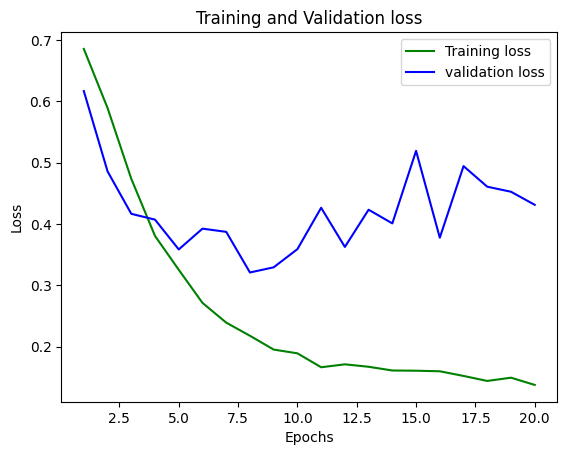

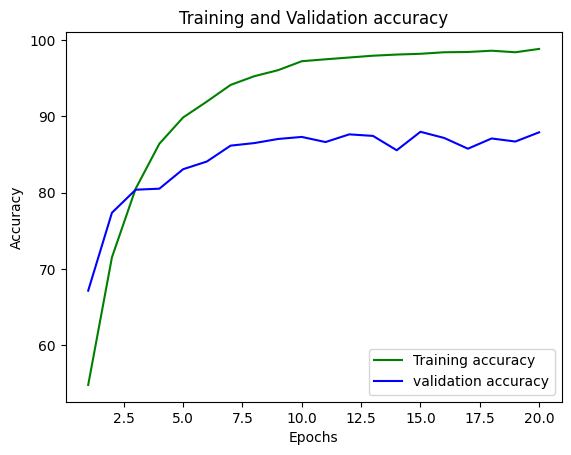

[[654 101]
 [ 79 655]]
True positive =  654
False positive =  101
False negative =  79
True negative =  655




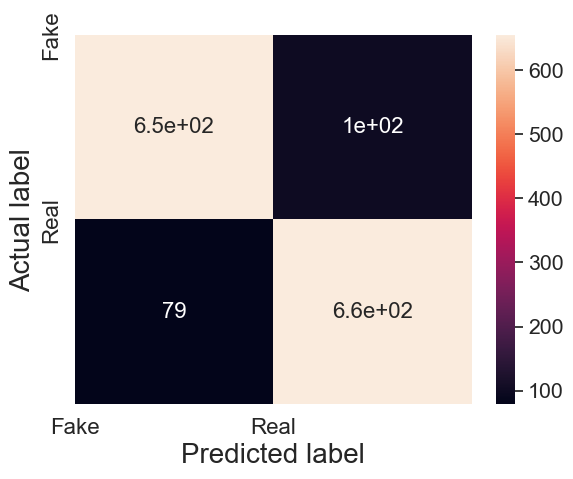

Calculated Accuracy 87.91134989926125


In [24]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs 
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)